<a href="https://colab.research.google.com/github/yoshihikom/thu_Details_of_Management_Information_BII_Lesson1/blob/main/hara2021_chap5_column_airbnb%2Bsubway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 「Python による経済・経営分析のための実践的データサイエンス」第５章 (pp.136-160)

こちらは、Python による経済・経営分析のための実践的データサイエンス第五章のColumn に掲載しております。Airbnb のデータセットを用いた分析を行うための Notebook です。

まずは, 今回利用するデータを取り込みます.(実データをご確認頂きやすくするために, excel データ (xlsx) にしています. ご自身の jupyternotebook で解析する場合には, Google Drive にアップロードしている AB_NYC_2019_2.xlsx をお使いくださいませ.このとき, notebook と同じディレクトリにデータを置くようにしてください)

In [ ]:
import pandas as pd
input_book = pd.ExcelFile('AB_NYC_2019_2.xlsx')

input_sheet_name = input_book.sheet_names
num_sheet = len(input_sheet_name)
print(input_sheet_name)
print("Sheet の数:", num_sheet)
input_sheet_df = input_book.parse(input_sheet_name[0])

#最初から10行目までを取り出す
input_sheet_df.head(10)

['AB_NYC_2019']
Sheet の数: 1


,id,name,host_id,host_name,neighbourhood_group,Manhattan_dummry,neighbourhood,latitude,longitude,room_type,private_dummy,home_dummy,shared_dummy,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,0,Kensington,40.64749,-73.97237,Private room,1,0,0,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,1,Midtown,40.75362,-73.98377,Entire home/apt,0,1,0,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,1,Harlem,40.80902,-73.94190,Private room,1,0,0,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,0,Clinton Hill,40.68514,-73.95976,Entire home/apt,0,1,0,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,1,East Harlem,40.79851,-73.94399,Entire home/apt,0,1,0,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,1,Murray Hill,40.74767,-73.97500,Entire home/apt,0,1,0,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,0,Bedford-Stuyvesant,40.68688,-73.95596,Private room,1,0,0,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,1,Hell's Kitchen,40.76489,-73.98493,Private room,1,0,0,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,1,Upper West Side,40.80178,-73.96723,Private room,1,0,0,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,1,Chinatown,40.71344,-73.99037,Entire home/apt,0,1,0,150,1,160,2019-06-09,1.33,4,188


データの読み込みが確認できたと思います。続いて, 回帰分析に利用する変数を取り込み, まずは 価格とレビュー数で単回帰を廻します.

傾き= -0.258 切片= 158.7956 信頼係数= -0.0477 p値= 0.0 標準誤差= 0.0246


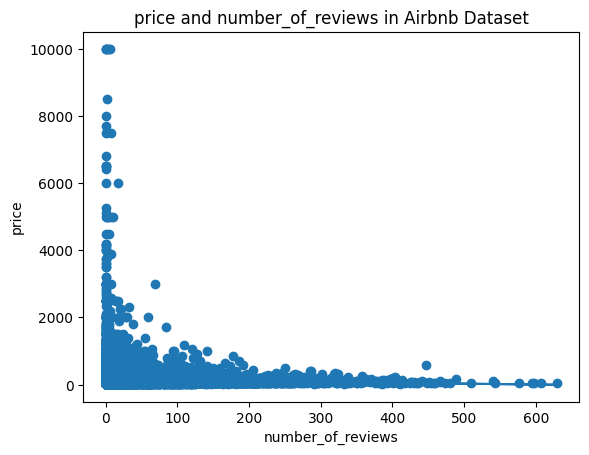

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats

#利用する変数を取り出す
#今回はExcel 側で, ダミー変数の作成を行っています.
#iloc を用い, excel の列を指定し一気にデータを取り出しています

#マンハッタンに所在するか
manhattan_dummy=input_sheet_df.iloc[:,5]
#プライベートルームか
private_dummy=input_sheet_df.iloc[:,10]
#家一軒貸し出しか
home_dummy=input_sheet_df.iloc[:,11]
#部屋が共有か
shared_dummy=input_sheet_df.iloc[:,12]
#貸し出し価格
price=input_sheet_df.iloc[:,13]
#最低貸し出し日数
minimum_nights=input_sheet_df.iloc[:,14]
#レビュー数
number_of_reviews=input_sheet_df.iloc[:,15]
#月ごとのレビュー数
reviews_per_month=input_sheet_df.iloc[:,17]
calculated_host_listings_count=input_sheet_df.iloc[:,18]
#貸し出し可能な日数
availability_365=input_sheet_df.iloc[:,19]

#もしくは、Excel の1行目に指定された変数名を指定する

#マンハッタンに所在するか
manhattan_dummy=input_sheet_df.Manhattan_dummry
#プライベートルームか
private_dummy=input_sheet_df.private_dummy
#家一軒貸し出しか
home_dummy=input_sheet_df.home_dummy
#部屋が共有か
shared_dummy=input_sheet_df.shared_dummy
#貸し出し価格
price=input_sheet_df.price
#最低貸し出し日数
minimum_nights=input_sheet_df.minimum_nights
#レビュー数
number_of_reviews=input_sheet_df.number_of_reviews
#月ごとのレビュー数
reviews_per_month=input_sheet_df.reviews_per_month
calculated_host_listings_count=input_sheet_df.calculated_host_listings_count
#貸し出し可能な日数
availability_365=input_sheet_df.availability_365


#単回帰を行う
#review の数と, 価格について回帰する
result = scipy.stats.linregress(number_of_reviews,price)
print('傾き=', result.slope.round(4), '切片=', result.intercept.round(4), '信頼係数=', result.rvalue.round(4), 'p値=', result.pvalue.round(4), '標準誤差=', result.stderr.round(4))
result_slope = result.slope
result_intercept = result.intercept

#散布図にプロットする. x軸をレビュー数にして, 縦軸を価格にする
plt.plot(number_of_reviews, [result_slope * u + result_intercept for u in number_of_reviews])
plt.scatter(number_of_reviews,price)
plt.title('price and number_of_reviews in Airbnb Dataset')
plt.ylabel('price')
plt.xlabel('number_of_reviews')
plt.show()

レビューの多い物件は, 価格が低いことが類推できます.続いて, 講義で取り上げたように, 別のパッケージで解析した結果を示しておきます.
P 値をみるとどちらも有意ですが, R 決定値はあまり高くないように見受けられますね.

In [ ]:
import statsmodels.api as sm
model = sm.OLS(price, sm.add_constant(number_of_reviews))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           9.53e-26
Time:                        06:49:55   Log-Likelihood:            -3.3383e+05
No. Observations:               48366   AIC:                         6.677e+05
Df Residuals:                   48364   BIC:                         6.677e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               158.7956      1.23

同様に, price を被説明変数にして, minimum_nights を説明変数にした単回帰の結果を示します. p値を観る限り有意ですが, 修正R二乗値を観る限り説明力はかなり低そうです.

In [ ]:
model2 = sm.OLS(price, sm.add_constant(minimum_nights))
results2 = model2.fit()
print(results2.summary())
print('p-values\n', results2.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     91.88
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           9.62e-22
Time:                        06:50:04   Log-Likelihood:            -3.3384e+05
No. Observations:               48366   AIC:                         6.677e+05
Df Residuals:                   48364   BIC:                         6.677e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            149.1926      1.157    128.

そこで, number_of_reviews と minimum_nights で散布図を書いた結果を観てみます.1200泊以上の部屋があるなど, 外れ値の予感がしますね.

Text(0.5, 0, 'number_of_reviews')

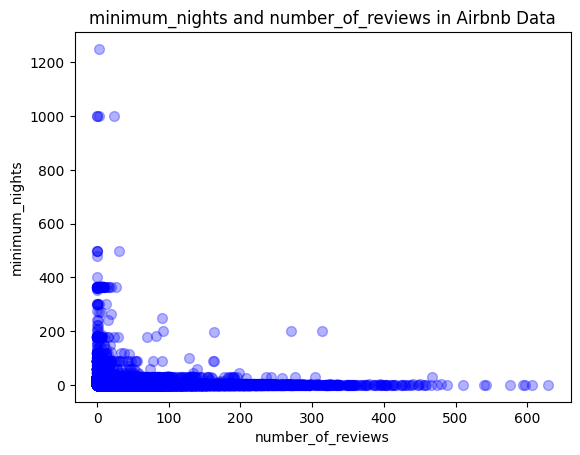

In [ ]:
plt.scatter(number_of_reviews,minimum_nights, s=50, c="blue", alpha=0.3, linewidths=1, edgecolors="blue")
plt.title('minimum_nights and number_of_reviews in Airbnb Data')
plt.ylabel('minimum_nights')
plt.xlabel('number_of_reviews')

今度は, seaborn というパッケージを使ってプロットしてみます.
ヒストグラムが出ているので, 分布に偏りがあることが確認できますね.

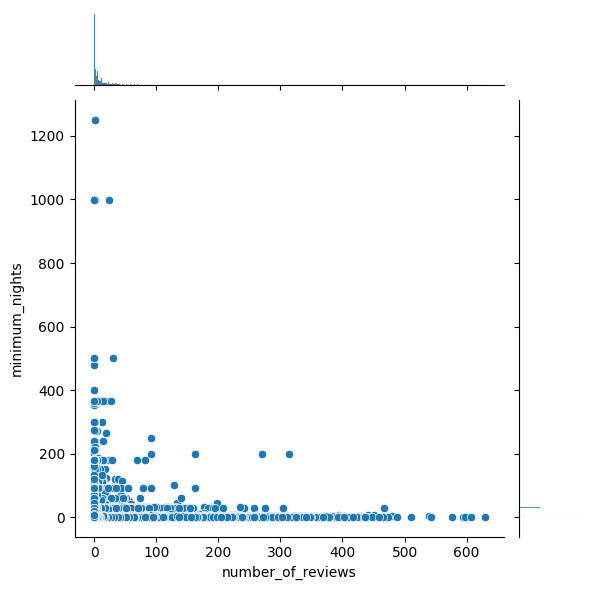

In [ ]:
import seaborn as sns
sns.jointplot(data=input_sheet_df,y="minimum_nights",x="number_of_reviews")

ここからは, 重回帰分析を行ってみましょう. sm.OLS を使って重回帰を行ってみます.まずは, 相関係数を確認しましょう.

<Axes: >

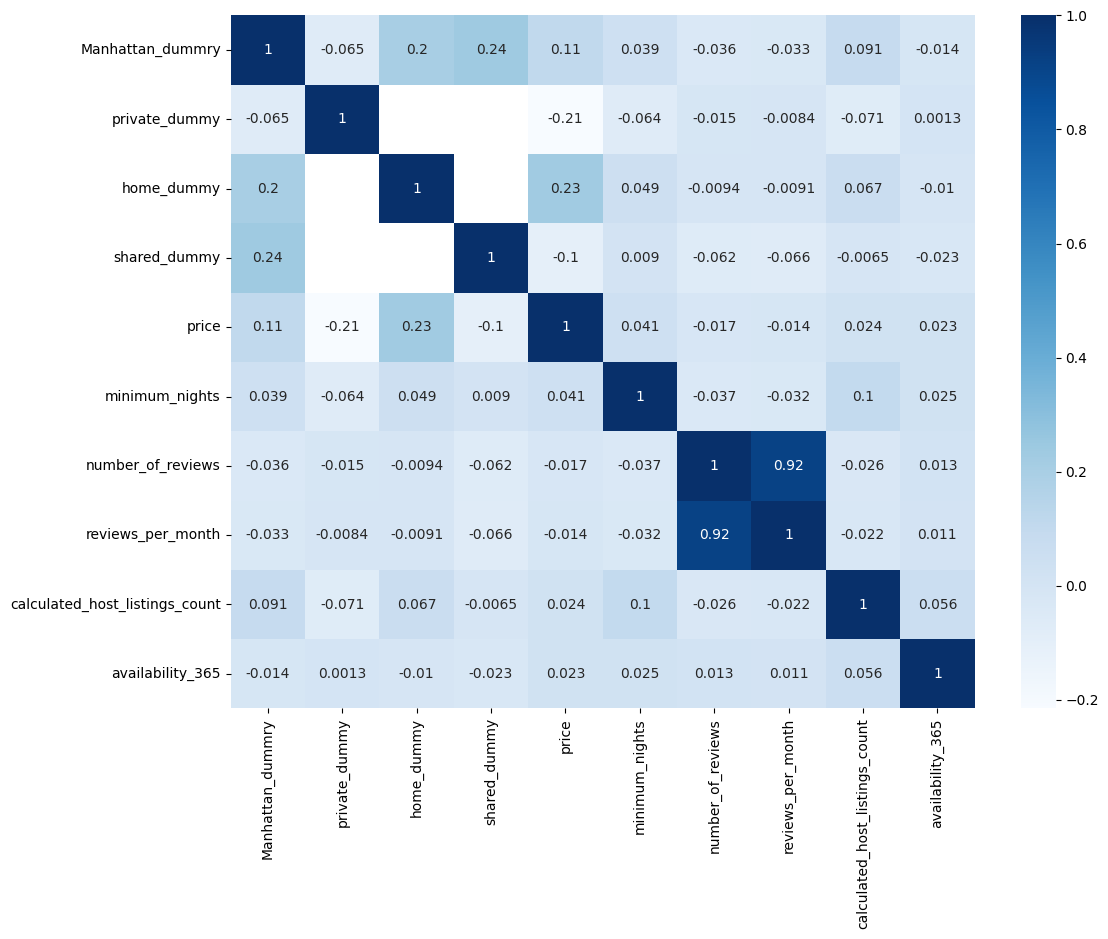

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 9))
equation_df=pd.concat([manhattan_dummy, private_dummy, home_dummy, shared_dummy, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365], axis=1)
sns.heatmap(equation_df.pct_change().corr(), annot=True, cmap='Blues')

続いて重回帰分析を行いましょう

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
#価格を被説明変数として取り出す
price = pd.DataFrame(equation_df.price)

#被説明変数であるprice をdrop する
x_list = equation_df.drop("price",1)
#相関係数が高かった reviews_per_month をdrop する
x_list = x_list.drop("reviews_per_month",1)
x_list = x_list.drop("shared_dummy",1)
x_list = x_list.drop("home_dummy",1)

#異常値やnull になっている値を除去する
x_list = x_list.drop(x_list.columns[np.isnan(x_list).any()], axis=1)

#線形回帰を実行する
model = sm.OLS(price, sm.add_constant(x_list))
result =model.fit()
print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     727.1
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:50:42   Log-Likelihood:            -3.3180e+05
No. Observations:               48366   AIC:                         6.636e+05
Df Residuals:                   48359   BIC:                         6.637e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<ipython-input-9-f2a3bf72d18a>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_list = equation_df.drop("price",1)
<ipython-input-9-f2a3bf72d18a>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_list = x_list.drop("reviews_per_month",1)
<ipython-input-9-f2a3bf72d18a>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_list = x_list.drop("shared_dummy",1)
<ipython-input-9-f2a3bf72d18a>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_list = x_list.drop("home_dummy",1)


あんまり説明力が高くないモデルが出来ました！
どうやら, ほかの要因が Airbnb の物件の価格には有意に効いているようです.

In [ ]:
from statsmodels.stats.outliers_influence import *
num_cols = model.exog.shape[1]
print(num_cols) #説明変数の列数
vifs = [variance_inflation_factor(model.exog, i) for i in range(0, num_cols)]
pdv = pd.DataFrame(vifs, index=model.exog_names, columns=["VIF"])
print(pdv)

7
                                     VIF
const                           3.947596
Manhattan_dummry                1.050466
private_dummy                   1.037052
minimum_nights                  1.047618
number_of_reviews               1.055285
calculated_host_listings_count  1.109118
availability_365                1.118322


VIF 値を観てみます. 少なくとも, 多重共線性は発生していないように見受けられます.

最後に, モデルで使った変数間の散布図を観てみましょう. なお, マンハッタンにある場合オレンジ, マンハッタンにない場合は青でプロットしています.

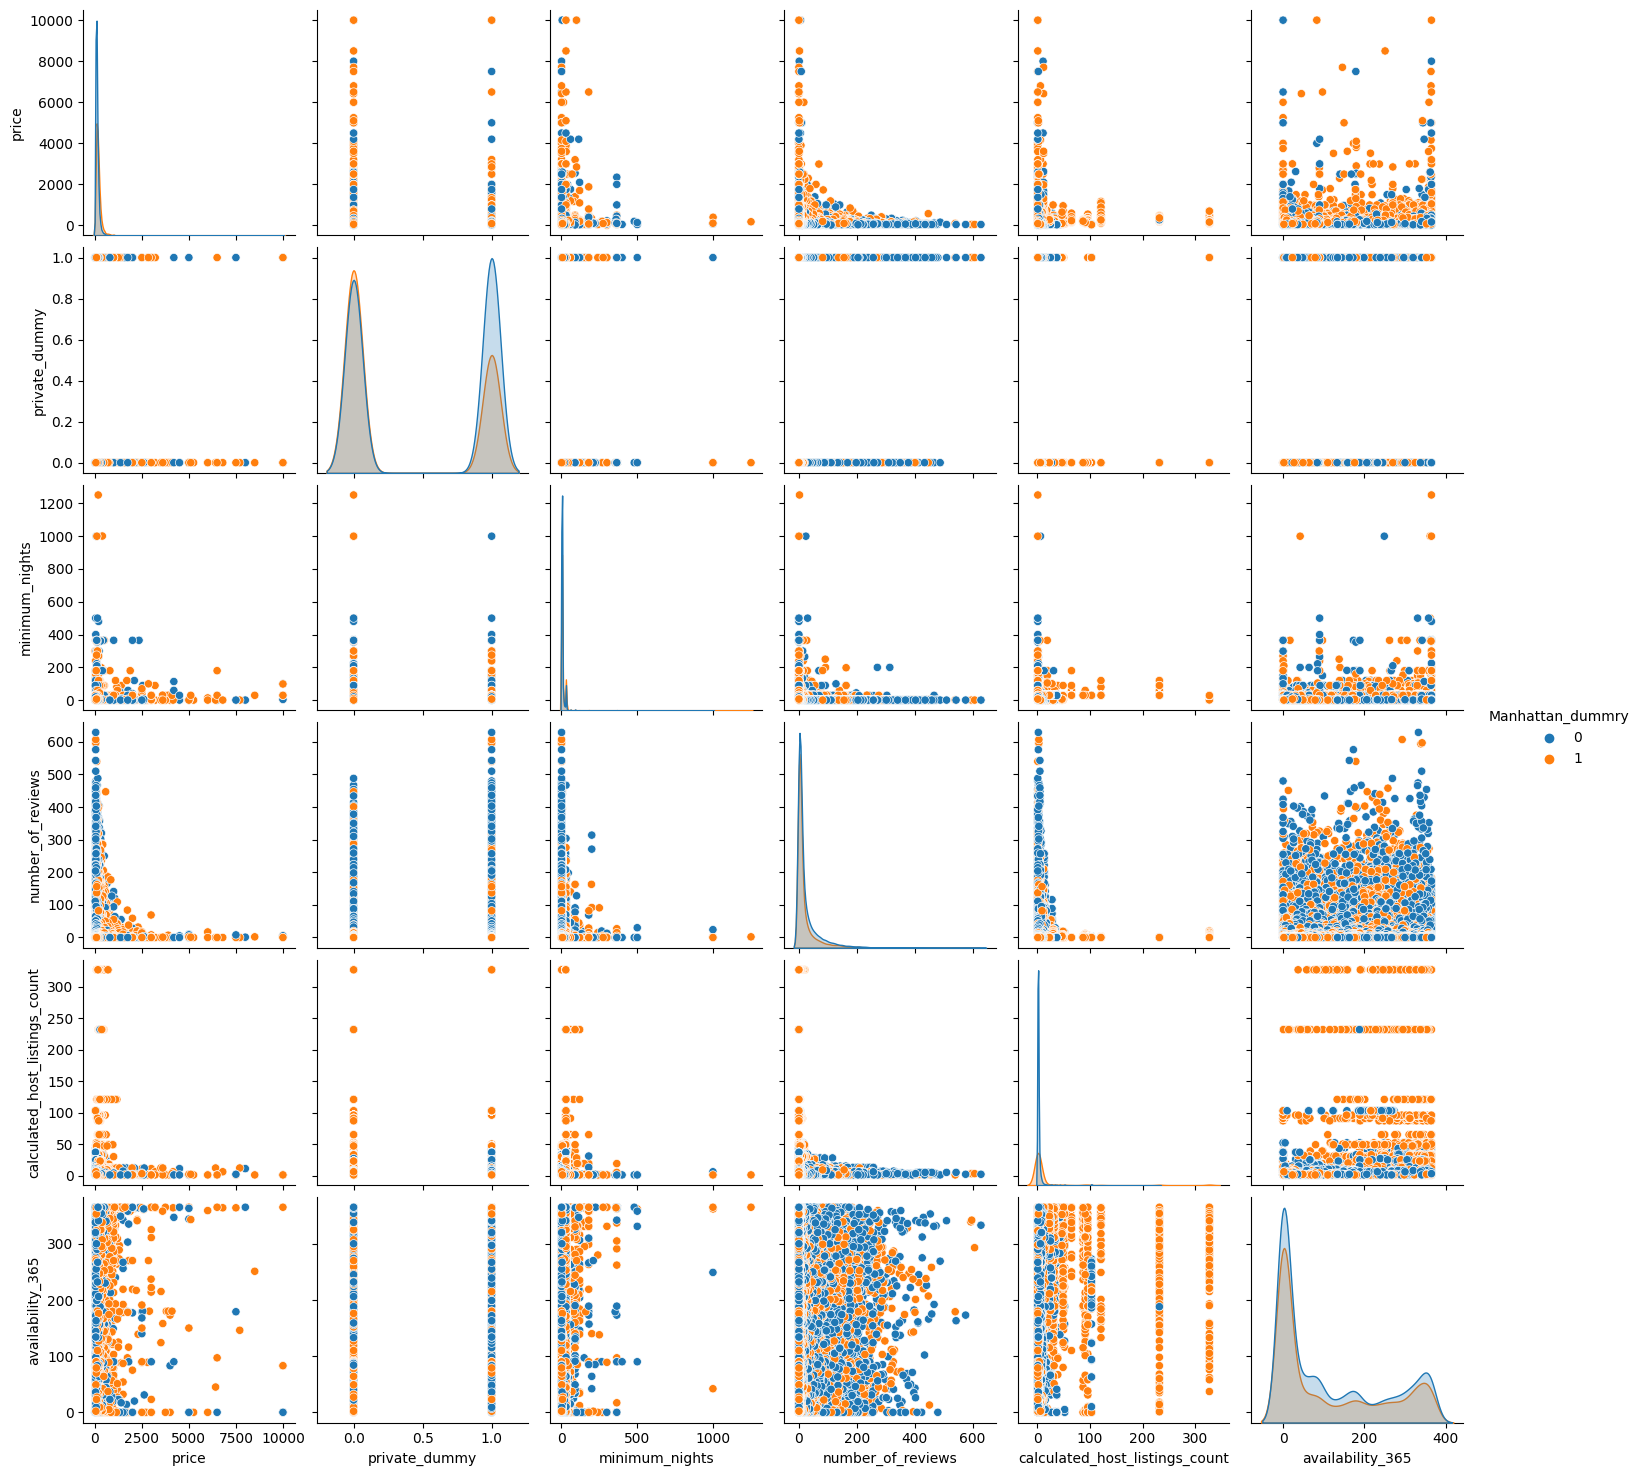

In [ ]:
equation_df2=pd.concat([number_of_reviews, price, availability_365, minimum_nights, manhattan_dummy], axis=1)
x_list3=pd.concat([price, x_list], axis=1)
sns.pairplot(x_list3, hue="Manhattan_dummry")

5.5.1 geocoding に必要なパッケージをインストールする (p.150)

In [ ]:
!pip install geopy
!pip install geocoder

5.5.2 ランドマークの位置情報を取得する

In [ ]:
#Geocoder を用いてCentral Park（自由の女神像）の場所を取得する
import geocoder
#location = '自由の女神像'
location = 'Central park'
address = geocoder.osm(location, timeout=5.0)
address.latlng

[40.7827725, -73.9653627406542]

ちなみに。p.151 の脚注に書いているように、「自由の女神」や「セントラルパーク」で検索すると以下の結果が出力されます。

In [ ]:
#Geocoder を用いて自由の女神像の場所を取得する
import geocoder
#location = '自由の女神'
location = 'セントラルパーク'
address2 = geocoder.osm(location, timeout=5.0)
address2.latlng

[37.3935066, 126.6345613]

5.5.3 ランドマークと、Airbnb ホストとの距離を測る

In [ ]:
import numpy as np
#geodesic をインポートする
from geopy.distance import geodesic


#空の箱を用意する
distance = []

#input_sheet_df 内にある緯度経度情報を取得し、
#x, y に取り込み、それをlocation に保存する
#Celtral Park(自由の女神像)と、Airbnb ホストとの直線距離をkm単位で測り、
#distance に保存する
for x,y in zip(input_sheet_df.latitude, input_sheet_df.longitude):
    location= np.array([x,y])
    distance.append(geodesic(address.latlng, location).km)

#input_sheet_df に distance 列を作成し
#取得した自由の女神との距離情報を格納する
input_sheet_df['distance']=distance

#先頭の部分のみ表示する
input_sheet_df.distance.head()

0    15.034569
1     3.591075
2     3.523753
3    10.852294
4     2.511622
Name: distance, dtype: float64

5.5.4 散布図やヒストグラムを求める

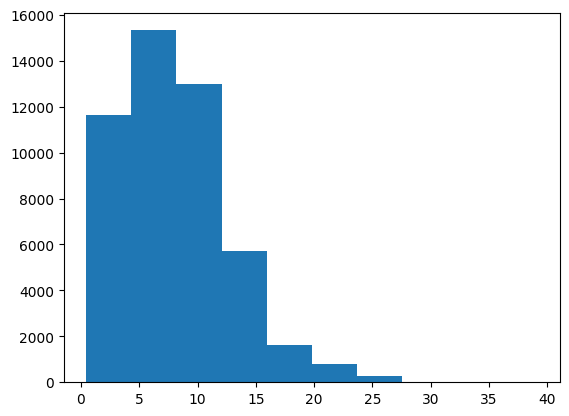

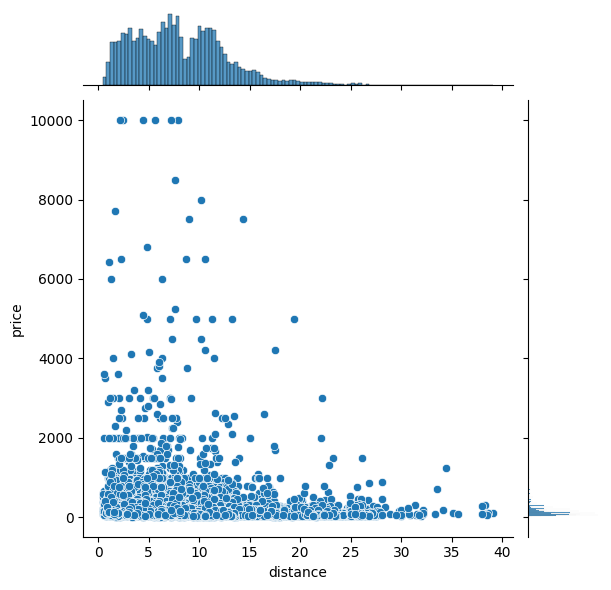

In [ ]:
#Central Park(自由の女神)との距離をヒストグラムにする
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(input_sheet_df.distance)
#価格とCentral Park(自由の女神)との距離を散布図にする
equation_df2=pd.concat([price, input_sheet_df.distance], axis=1)
sns.jointplot(x='distance',y= 'price', data=equation_df2)

5.5.5 地図上にプロットする

In [ ]:
!pip install folium

地図上に Airbnb ホストをプロットします。

In [ ]:
import folium
import pandas as pd

#利用するデータセットを決める
#先頭から1000エントリまでの緯度・経度・ホスト名を取得する
places = pd.concat([input_sheet_df.latitude.head(1000), input_sheet_df.longitude.head(1000), input_sheet_df.name.head(1000)], axis=1)

#地図の表示箇所を決める
#今回は「自由の女神像」の位置情報を用いる
map = folium.Map(location=address.latlng, zoom_start=10)

#緯度・経度と場所情報をプロットする
for i, r in places.iterrows():
    folium.Marker(location=[r['latitude'], r['longitude']], popup=places['name']).add_to(map)

#地図をhtml ファイルとして保存する
#colorを指定すると，TypeError: render() got an unexpected keyword argument 'color'　となるため削除した
map.save("map_nyc.html")
#map.save("map_nyc.html", color="gray") #colorは利用不可になっているようなので取り除く


同様に、ヒートマップを描画します。notebook と同じディレクトリに、html ファイルが作成されます。

In [ ]:
import folium
#ヒートマップパッケージをインポートする
from folium.plugins import HeatMap

#緯度経度を指定する
places2 = pd.concat([input_sheet_df.latitude, input_sheet_df.longitude], axis=1)
map2 = folium.Map(location=address.latlng, zoom_start=10)

#緯度・経度と場所情報をプロットする
HeatMap(places2, radius=6, blur=5).add_to(map2)

#地図をhtml ファイルとして保存する
map2.save("map_nyc_heatmap_airbnb.html", color="gray")

5.5.6 回帰分析を行う

In [ ]:
#単回帰の結果を確認する
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression

#線形回帰を実行する
model = sm.OLS(price, sm.add_constant(input_sheet_df.distance))
result =model.fit()
print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     694.1
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          6.79e-152
Time:                        06:57:05   Log-Likelihood:            -3.3354e+05
No. Observations:               48366   AIC:                         6.671e+05
Df Residuals:                   48364   BIC:                         6.671e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.3336      2.172     93.155      0.0

In [21]:
import pandas as pd
import io

#データを読み込む
input_data = pd.read_csv("US_subway_data.csv")

In [22]:
input_data.head(10)

,index,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
0,0,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1800 Duke St, Ste 100",Alexandria,VA,22314,USA,NaN,NaN,...,NaN,NaN,"Monday 7:00 AM - 7:00 PM, Tuesday 7:00 AM - 7:...",38.8043,-77.0611,NaN,NaN,NaN,NaN,NaN
1,1,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1512 King St,",Alexandria,VA,22301,USA,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:0...",38.8062,-77.0565,NaN,NaN,NaN,NaN,NaN
2,2,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"2361 Eisenhower Ave,",Alexandria,VA,22314,USA,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 8:30 PM, Monday 6:30 AM - 9:0...",38.8012,-77.0691,NaN,NaN,NaN,NaN,NaN
3,3,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"320 King Street, 1st Floor",Alexandria,VA,22314,USA,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 8:00 PM, Monday 7:00 AM - 9:0...",38.8045,-77.0433,NaN,NaN,NaN,NaN,NaN
4,4,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"5836 N. Kings Hwy, Suite A, Huntington Station",Alexandria,VA,22303,USA,NaN,NaN,...,NaN,NaN,"Sunday 9:00 AM - 9:00 PM, Monday 7:00 AM - 10:...",38.7903,-77.0769,NaN,NaN,NaN,NaN,NaN
5,5,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"101 Independence Ave S. E., Library of Congress",Washington,DC,20540,USA,NaN,NaN,...,NaN,NaN,"Monday 10:00 AM - 4:00 PM, Tuesday 10:00 AM - ...",38.8871,-77.0041,NaN,NaN,NaN,NaN,NaN
6,6,Subway,NaN,"Rayburn Bldg., 45 Independence Ave. SW, US Hou...",Washington,DC,20515,USA,NaN,NaN,...,NaN,NaN,"Monday 11:00 AM - 6:00 PM, Tuesday 11:00 AM - ...",38.8870,-77.0106,NaN,NaN,NaN,NaN,NaN
7,7,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"430 8th St SE,",Washington,DC,20003,USA,NaN,NaN,...,NaN,NaN,"Sunday 8:00 AM - 9:45 PM, Monday 7:00 AM - 11:...",38.8829,-76.9946,NaN,NaN,NaN,NaN,NaN
8,8,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"1100 New Jersey Ave SE, 1st Floor, Federal Gat...",Washington,DC,20003,USA,NaN,NaN,...,NaN,NaN,"Sunday 8:00 AM - 10:00 PM, Monday 6:00 AM - 11...",38.8770,-77.0037,NaN,NaN,NaN,NaN,NaN
9,9,Subway,http://order.subway.com/Stores/Redirect.aspx?s...,"50 Massachusetts Ave NE, Union Station",Washington,DC,20002,USA,NaN,NaN,...,NaN,NaN,"Sunday 10:00 AM - 7:00 PM, Monday 7:00 AM - 9:...",38.8971,-77.0064,NaN,NaN,NaN,NaN,NaN


In [27]:
import folium
import pandas as pd

#利用するデータセットを決める
#緯度・経度・住所を取得する
places = pd.concat([input_data.latitude, input_data.longitude, input_data.street_address], axis=1)

#地図の表示箇所を決める
#今回は「自由の女神像」の位置情報を用いる
map = folium.Map(location=address.latlng, zoom_start=10)

#緯度・経度と場所情報をプロットする
for i, r in places.iterrows():
    folium.Marker(location=[r['latitude'], r['longitude']], popup=places['street_address']).add_to(map)

#地図をhtml ファイルとして保存する
#colorを指定すると，TypeError: render() got an unexpected keyword argument 'color'　となるため削除した
map.save("map_sabway.html")
#map.save("map_nyc.html", color="gray") #colorは利用不可になっているようなので取り除く

In [25]:
import folium
#ヒートマップパッケージをインポートする
from folium.plugins import HeatMap

#緯度経度を指定する
places2 = pd.concat([input_data.latitude, input_data.longitude], axis=1)
map2 = folium.Map(location=address.latlng, zoom_start=10)

#緯度・経度と場所情報をプロットする
HeatMap(places2, radius=6, blur=5).add_to(map2)

#地図をhtml ファイルとして保存する
map2.save("map_subway_heatmap_airbnb.html", color="gray")